<a href="https://colab.research.google.com/github/jijan67/Crop-Recommendation-System-Using-Ensemble-Learning-With-99-Percent-Accuracy/blob/main/Crop_Recommendation_System_Using_Ensemble_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import tensorflow as tf


In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Crop_recommendation.csv')


In [ ]:
# Encode the target labels
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])
class_names = le.classes_


In [ ]:
# Split features and labels
X = df.drop('label', axis=1)
y = df['label']


In [ ]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)


In [ ]:
# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Train Support Vector Machine (SVM) model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)


SVC(random_state=42)

In [ ]:
# Function to preprocess input data for CNN (if needed)
def preprocess_for_cnn(X):
    return X.reshape(-1, 7, 1)  # Reshape for CNN input


In [ ]:
# CNN model (example architecture)
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(32, kernel_size=2, activation='relu', input_shape=(7, 1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train CNN model (if needed)
X_train_cnn = preprocess_for_cnn(X_train)
X_test_cnn = preprocess_for_cnn(X_test)
cnn_model.fit(X_train_cnn, y_train, epochs=100, batch_size=32, validation_data=(X_test_cnn, y_test))


Epoch 1/100
62/62 [==============================] - 4s 14ms/step - loss: 2.6081 - accuracy: 0.3384 - val_loss: 2.0121 - val_accuracy: 0.5636
Epoch 2/100
62/62 [==============================] - 1s 10ms/step - loss: 1.4419 - accuracy: 0.6960 - val_loss: 1.0300 - val_accuracy: 0.7636
Epoch 3/100
62/62 [==============================] - 1s 9ms/step - loss: 0.7204 - accuracy: 0.8556 - val_loss: 0.5942 - val_accuracy: 0.8682
Epoch 4/100
62/62 [==============================] - 1s 8ms/step - loss: 0.4412 - accuracy: 0.8955 - val_loss: 0.4335 - val_accuracy: 0.8909
Epoch 5/100
62/62 [==============================] - 0s 6ms/step - loss: 0.3150 - accuracy: 0.9207 - val_loss: 0.3309 - val_accuracy: 0.9000
Epoch 6/100
62/62 [==============================] - 0s 8ms/step - loss: 0.2508 - accuracy: 0.9323 - val_loss: 0.2933 - val_accuracy: 0.9136
Epoch 7/100
62/62 [==============================] - 0s 7ms/step - loss: 0.2086 - accuracy: 0.9414 - val_loss: 0.2551 - val_accuracy: 0.9136
Epoch 8/100

In [ ]:
# Combine predictions from all models
y_pred_rf = rf_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)
y_pred_cnn_probs = cnn_model.predict(X_test_cnn)
y_pred_cnn = np.argmax(y_pred_cnn_probs, axis=1)


7/7 [==============================] - 0s 7ms/step


In [ ]:
# Ensemble strategy (simple voting)
y_pred_combined = np.array([y_pred_rf, y_pred_svm, y_pred_cnn]).T
y_pred_final = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=y_pred_combined)


In [ ]:
# Evaluate the final ensemble model
print("Ensemble Model Evaluation:")
print(classification_report(y_test, y_pred_final, target_names=class_names))


Ensemble Model Evaluation:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00         9
      banana       1.00      1.00      1.00        12
   blackgram       1.00      0.92      0.96        13
    chickpea       1.00      1.00      1.00        13
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00         9
      cotton       1.00      1.00      1.00         6
      grapes       1.00      1.00      1.00         8
        jute       0.92      1.00      0.96        11
 kidneybeans       1.00      1.00      1.00        13
      lentil       0.78      1.00      0.88         7
       maize       1.00      1.00      1.00        12
       mango       1.00      1.00      1.00         4
   mothbeans       1.00      0.91      0.95        11
    mungbean       1.00      1.00      1.00        10
   muskmelon       1.00      1.00      1.00         7
      orange       1.00      1.00      1.00         9


In [ ]:
# Calculate accuracy
accuracy = np.mean(y_test == y_pred_final)

# Print accuracy with four decimal places
print(f"Accuracy: {accuracy * 100:.4f}%")

Accuracy: 98.6364%


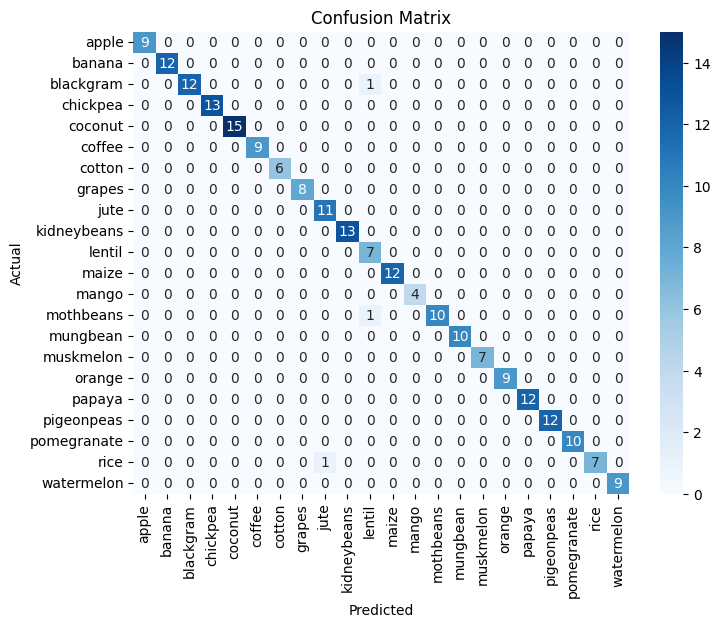

In [ ]:
# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Function to recommend crop based on input features
def recommend_crop(N, P, K, temperature, humidity, ph, rainfall):
    input_data = scaler.transform([[N, P, K, temperature, humidity, ph, rainfall]])

    # Predict with Random Forest
    prediction_rf = rf_model.predict(input_data)[0]

    # Predict with SVM
    prediction_svm = svm_model.predict(input_data)[0]

    # Predict with CNN
    input_data_cnn = preprocess_for_cnn(input_data)
    prediction_cnn_probs = cnn_model.predict(input_data_cnn)
    prediction_cnn = np.argmax(prediction_cnn_probs, axis=1)[0]

    # Voting strategy for final prediction
    predictions = [prediction_rf, prediction_svm, prediction_cnn]
    final_prediction = max(set(predictions), key=predictions.count)

    recommended_crop = le.inverse_transform([final_prediction])[0]
    return recommended_crop
# Sample input features
N = 90
P = 42
K = 43
temperature = 25
humidity = 86
ph = 6.5
rainfall = 220

In [ ]:
# Make prediction
recommended_crop = recommend_crop(N, P, K, temperature, humidity, ph, rainfall)
print("Recommended Crop:", recommended_crop)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 96ms/step
Recommended Crop: rice
